In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!unzip exp_data.zip

Archive:  exp_data.zip
   creating: data/
   creating: data/1/
  inflating: data/1/displacement_data.csv  
  inflating: data/1/reaction_data.csv  
   creating: data/2/
  inflating: data/2/displacement_data.csv  
  inflating: data/2/reaction_data.csv  
   creating: data/3/
  inflating: data/3/displacement_data.csv  
  inflating: data/3/reaction_data.csv  
   creating: data/4/
  inflating: data/4/displacement_data.csv  
  inflating: data/4/reaction_data.csv  
   creating: data/5/
  inflating: data/5/displacement_data.csv  
  inflating: data/5/reaction_data.csv  


# Trying to solve using fitted curve
____________________________________________

#Fitting the most accurate curve


In [26]:
df = pd.read_csv("/content/data/1/displacement_data.csv")

In [27]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

x = df['x'].values
y = df['y'].values
u_x = df['u_x'].values
u_y = df['u_y'].values
xy_data = (x, y)

# Define the models for fitting
def linear_model(X, a, b, c):
    x, y = X
    return a * x + b * y + c

def quadratic_model(X, a, b, c, d, e, f):
    x, y = X
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f

def cubic_model(X, a, b, c, d, e, f, g, h, i, j):
    x, y = X
    return (a * x**3 + b * y**3 + c * x**2 * y + d * x * y**2 +
            e * x**2 + f * y**2 + g * x * y + h * x + i * y + j)

def biquadratic_model(X, a, b, c, d, e, f, g, h):
    x, y = X
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f * x**2 * y + g * x * y**2 + h

# Function to fit model and calculate MSE and R^2
def fit_and_evaluate(model, xy_data, target):
    params, _ = curve_fit(model, xy_data, target, maxfev=10000)
    predictions = model(xy_data, *params)
    mse = mean_squared_error(target, predictions)
    r2 = r2_score(target, predictions)
    return params, mse, r2

# Fit each model to u_x
params_linear_x, mse_linear_x, r2_linear_x = fit_and_evaluate(linear_model, xy_data, u_x)
params_quadratic_x, mse_quadratic_x, r2_quadratic_x = fit_and_evaluate(quadratic_model, xy_data, u_x)
params_cubic_x, mse_cubic_x, r2_cubic_x = fit_and_evaluate(cubic_model, xy_data, u_x)
params_biquadratic_x, mse_biquadratic_x, r2_biquadratic_x = fit_and_evaluate(biquadratic_model, xy_data, u_x)

# Fit each model to u_y
params_linear_y, mse_linear_y, r2_linear_y = fit_and_evaluate(linear_model, xy_data, u_y)
params_quadratic_y, mse_quadratic_y, r2_quadratic_y = fit_and_evaluate(quadratic_model, xy_data, u_y)
params_cubic_y, mse_cubic_y, r2_cubic_y = fit_and_evaluate(cubic_model, xy_data, u_y)
params_biquadratic_y, mse_biquadratic_y, r2_biquadratic_y = fit_and_evaluate(biquadratic_model, xy_data, u_y)

# Collect the results in a dictionary for easy comparison
results = {
    "u_x": {
        "Linear": {"Params": params_linear_x, "MSE": mse_linear_x, "R2": r2_linear_x},
        "Quadratic": {"Params": params_quadratic_x, "MSE": mse_quadratic_x, "R2": r2_quadratic_x},
        "Cubic": {"Params": params_cubic_x, "MSE": mse_cubic_x, "R2": r2_cubic_x},
        "Biquadratic": {"Params": params_biquadratic_x, "MSE": mse_biquadratic_x, "R2": r2_biquadratic_x}
    },
    "u_y": {
        "Linear": {"Params": params_linear_y, "MSE": mse_linear_y, "R2": r2_linear_y},
        "Quadratic": {"Params": params_quadratic_y, "MSE": mse_quadratic_y, "R2": r2_quadratic_y},
        "Cubic": {"Params": params_cubic_y, "MSE": mse_cubic_y, "R2": r2_cubic_y},
        "Biquadratic": {"Params": params_biquadratic_y, "MSE": mse_biquadratic_y, "R2": r2_biquadratic_y}
    }
}

# Print results for each fit with R2, MSE, and parameters, and identify the best model based on R2
for target, models in results.items():
    print(f"\nResults for {target}:")
    for model_name, metrics in models.items():
        print(f"{model_name} Model - MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}, Params: {metrics['Params']}")

# Identify best models based on R^2 for u_x and u_y
best_fit_x = max(results["u_x"], key=lambda model: results["u_x"][model]["R2"])
best_fit_y = max(results["u_y"], key=lambda model: results["u_y"][model]["R2"])

# Print the best-fitting models
print(f"\nBest fit for u_x: {best_fit_x} Model with R2 = {results['u_x'][best_fit_x]['R2']:.4f}")
print(f"Best fit for u_y: {best_fit_y} Model with R2 = {results['u_y'][best_fit_y]['R2']:.4f}")



Results for u_x:
Linear Model - MSE: 0.0000, R2: 0.9751, Params: [ 5.77969931e-05 -8.30826370e-08 -3.86043199e-06]
Quadratic Model - MSE: 0.0000, R2: 0.9751, Params: [-1.49005046e-07 -1.48956424e-07 -2.03902258e-08  5.79562164e-05
  7.58009529e-08 -3.91322775e-06]
Cubic Model - MSE: 0.0000, R2: 0.9943, Params: [-1.20822755e-04  2.85067461e-07  3.24330500e-07  1.39512917e-06
  1.81059094e-04 -1.06115656e-06 -1.76704243e-06 -1.36976929e-05
  9.05191880e-07  1.69210901e-06]
Biquadratic Model - MSE: 0.0000, R2: 0.9752, Params: [-5.47853021e-08 -1.56101377e-06 -2.65788389e-06  5.83266021e-05
  1.45496156e-06 -1.95295659e-07  2.83571189e-06 -4.12930002e-06]

Results for u_y:
Linear Model - MSE: 0.0000, R2: 0.9296, Params: [ 7.57893632e-08  1.14606539e-04 -7.29866602e-06]
Quadratic Model - MSE: 0.0000, R2: 0.9296, Params: [-5.11962842e-07 -2.31013271e-08  1.83646157e-07  4.96694180e-07
  1.14537797e-04 -7.33875039e-06]
Cubic Model - MSE: 0.0000, R2: 0.9580, Params: [ 6.16435876e-07 -2.432841

#Visualizing ux/uy plot

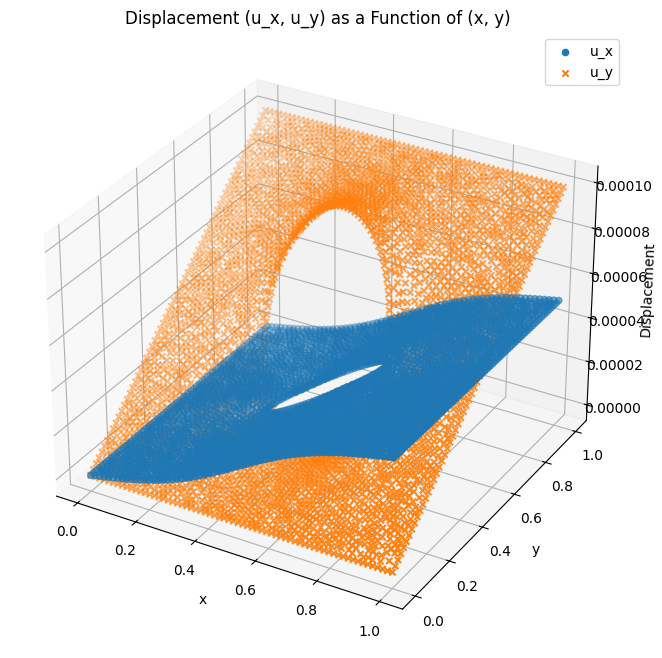

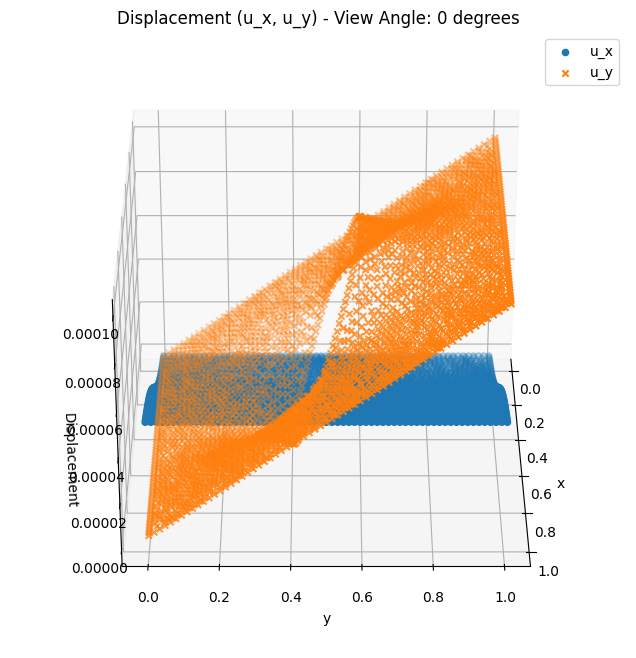

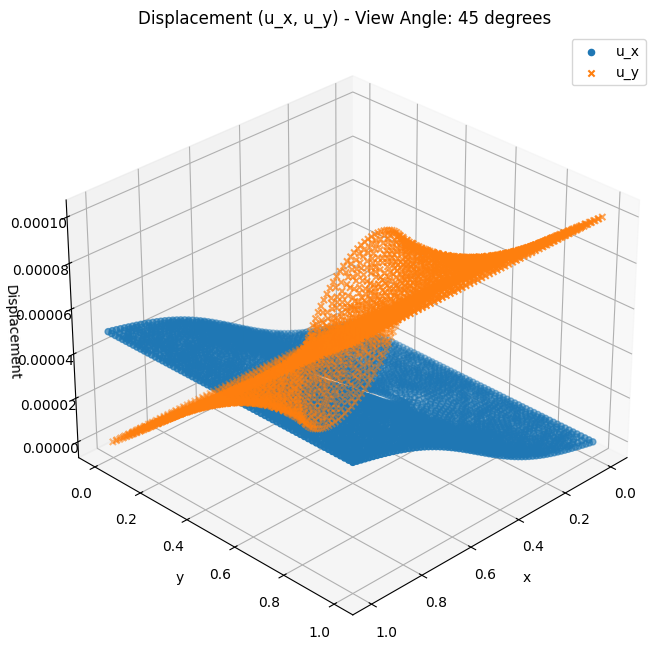

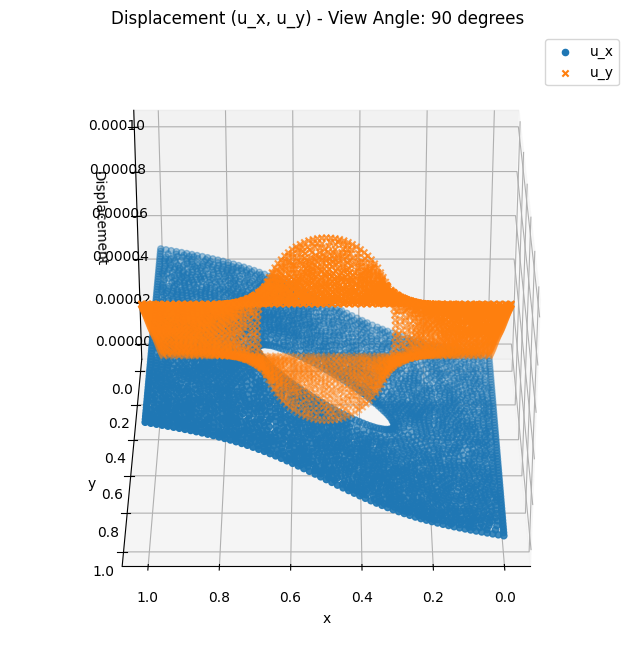

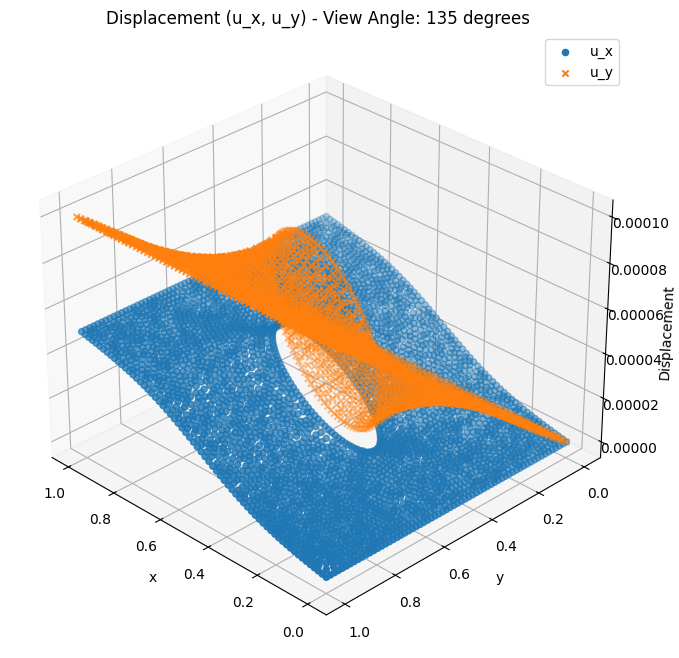

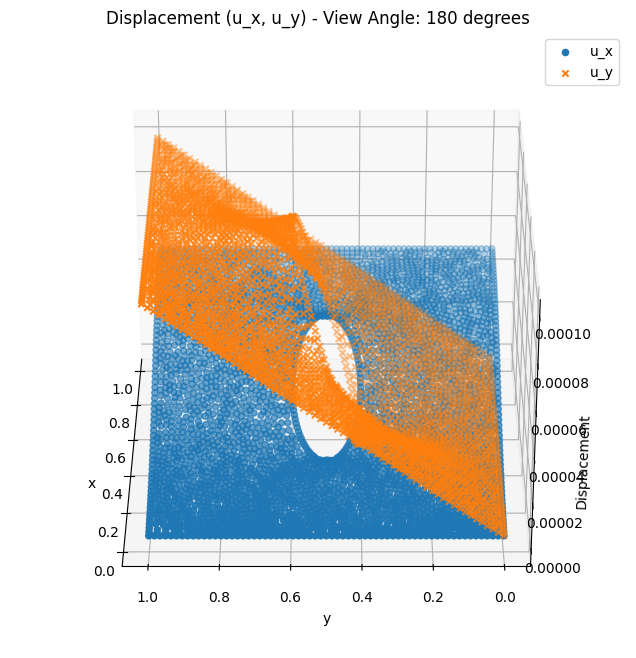

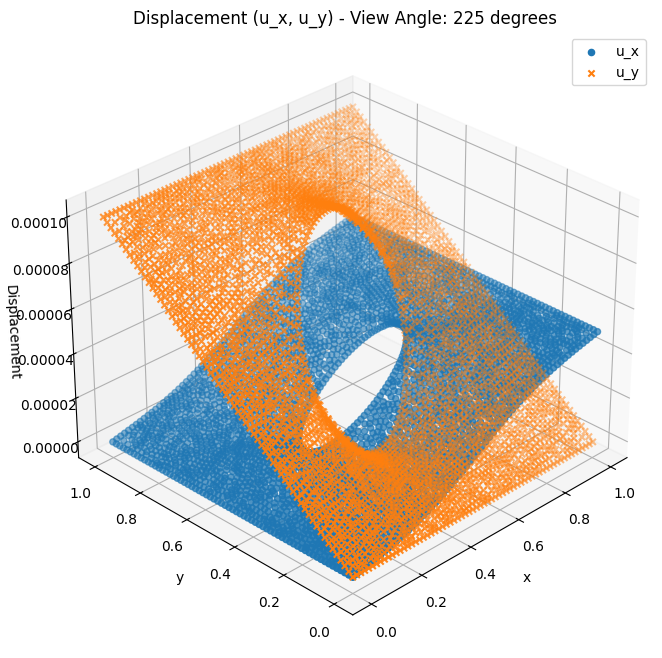

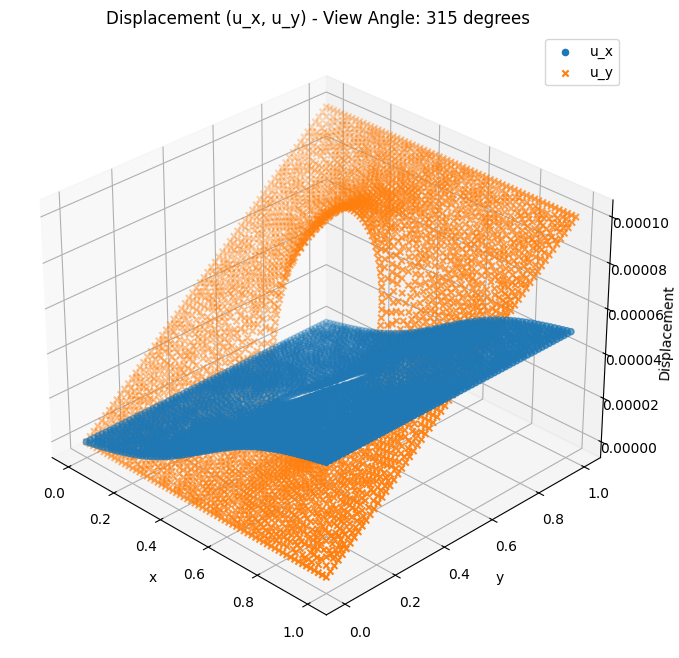

In [28]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot u_x
ax.scatter(x, y, u_x, label='u_x', marker='o', s=20)

# Plot u_y (you can adjust the marker and color)
ax.scatter(x, y, u_y, label='u_y', marker='x', s=20)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Displacement')
ax.set_title('Displacement (u_x, u_y) as a Function of (x, y)')
ax.legend()

# Show the plot
plt.show()


# Function to plot from different angles
def plot_from_angles(x, y, u_x, u_y, angles):
    for angle in angles:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(elev=30, azim=angle)  # Set the elevation and azimuth angles

        ax.scatter(x, y, u_x, label='u_x', marker='o', s=20)
        ax.scatter(x, y, u_y, label='u_y', marker='x', s=20)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Displacement')
        ax.set_title(f'Displacement (u_x, u_y) - View Angle: {angle} degrees')
        ax.legend()
        plt.show()

# Example angles
angles_to_plot = [0, 45, 90, 135, 180, 225, 270, 315]
plot_from_angles(x, y, u_x, u_y, angles_to_plot)

#Reading the given dataset

In [29]:
df1 = pd.read_csv("/content/data/1/displacement_data.csv")
r1 = pd.read_csv("/content/data/1/reaction_data.csv")

df2 = pd.read_csv("/content/data/2/displacement_data.csv")
r2 = pd.read_csv("/content/data/2/reaction_data.csv")

df3 = pd.read_csv("/content/data/3/displacement_data.csv")
r3 = pd.read_csv("/content/data/3/reaction_data.csv")

df4 = pd.read_csv("/content/data/4/displacement_data.csv")
r4 = pd.read_csv("/content/data/4/reaction_data.csv")

df5 = pd.read_csv("/content/data/5/displacement_data.csv")
r5 = pd.read_csv("/content/data/5/reaction_data.csv")

In [30]:
# Load step 1
R4_df1 = r1[r1["Reaction"] == "R4"]["Value"].iloc[0]
R2_df1 = r1[r1["Reaction"] == "R2"]["Value"].iloc[0]
print(f"R4_df1: {R4_df1}")
print(f"R2_df1: {R2_df1}")

# Load step 2
R4_df2 = r2[r2["Reaction"] == "R4"]["Value"].iloc[0]
R2_df2 = r2[r2["Reaction"] == "R2"]["Value"].iloc[0]
print(f"R4_df2: {R4_df2}")
print(f"R2_df2: {R2_df2}")

# Load step 3
R4_df3 = r3[r3["Reaction"] == "R4"]["Value"].iloc[0]
R2_df3 = r3[r3["Reaction"] == "R2"]["Value"].iloc[0]
print(f"R4_df3: {R4_df3}")
print(f"R2_df3: {R2_df3}")

# Load step 4
R4_df4 = r4[r4["Reaction"] == "R4"]["Value"].iloc[0]
R2_df4 = r4[r4["Reaction"] == "R2"]["Value"].iloc[0]
print(f"R4_df4: {R4_df4}")
print(f"R2_df4: {R2_df4}")

# Load step 5
R4_df5 = r5[r5["Reaction"] == "R4"]["Value"].iloc[0]
R2_df5 = r5[r5["Reaction"] == "R2"]["Value"].iloc[0]
print(f"R4_df5: {R4_df5}")
print(f"R2_df5: {R2_df5}")


R4_df1: 21319457.457487818
R2_df1: 25377160.17755209
R4_df2: 42638914.91497561
R2_df2: 50754320.35510449
R4_df3: 63958372.37246344
R2_df3: 76131480.53265694
R4_df4: 85277829.82995124
R2_df4: 101508640.71020932
R4_df5: 106597287.3
R2_df5: 126885800.9


#Fit the curve

In [31]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Initialize dictionaries to store results
ux_params_dict = {}
uy_params_dict = {}

# Loop through each load step
for i in range(1, 6):
    # Get the dataframe for the current load step
    df = globals()[f"df{i}"]

    # Extract x, y, u_x, and u_y values
    x = df['x'].values
    y = df['y'].values
    u_x = df['u_x'].values
    u_y = df['u_y'].values
    xy_data = (x, y)

    # Fit the cubic model to u_x and store results
    ux_params, mse_cubic_x, r2_cubic_x = fit_and_evaluate(cubic_model, xy_data, u_x)
    ux_params_dict[f"ux_df{i}"] = (ux_params, mse_cubic_x, r2_cubic_x)

    # Fit the cubic model to u_y and store results
    uy_params, mse_cubic_y, r2_cubic_y = fit_and_evaluate(cubic_model, xy_data, u_y)
    uy_params_dict[f"uy_df{i}"] = (uy_params, mse_cubic_y, r2_cubic_y)

# Return the dictionaries containing parameters, MSE, and R^2 for each load step
ux_params_dict, uy_params_dict


({'ux_df1': (array([-1.20822755e-04,  2.85067461e-07,  3.24330500e-07,  1.39512917e-06,
           1.81059094e-04, -1.06115656e-06, -1.76704243e-06, -1.36976929e-05,
           9.05191880e-07,  1.69210901e-06]),
   1.7482975900642457e-12,
   0.9943115185874698),
  'ux_df2': (array([-2.41645511e-04,  5.70015478e-07,  6.48649697e-07,  2.79027851e-06,
           3.62118196e-04, -2.12214472e-06, -3.53409333e-06, -2.73953895e-05,
           1.81032128e-06,  3.38422317e-06]),
   6.9931903602583044e-12,
   0.9943115185874687),
  'ux_df3': (array([-3.62468269e-04,  8.55183569e-07,  9.73024269e-07,  4.18537208e-06,
           5.43177274e-04, -3.18342987e-06, -5.30114152e-06, -4.10930712e-05,
           2.71555617e-06,  5.07632890e-06]),
   1.573467831056609e-11,
   0.9943115185874698),
  'ux_df4': (array([-4.83291021e-04,  1.14014155e-06,  1.29738933e-06,  5.58056727e-06,
           7.24236344e-04, -4.24446062e-06, -7.06828871e-06, -5.47907298e-05,
           3.62072964e-06,  6.76843193e-06]),


#Visualizing fitted curve

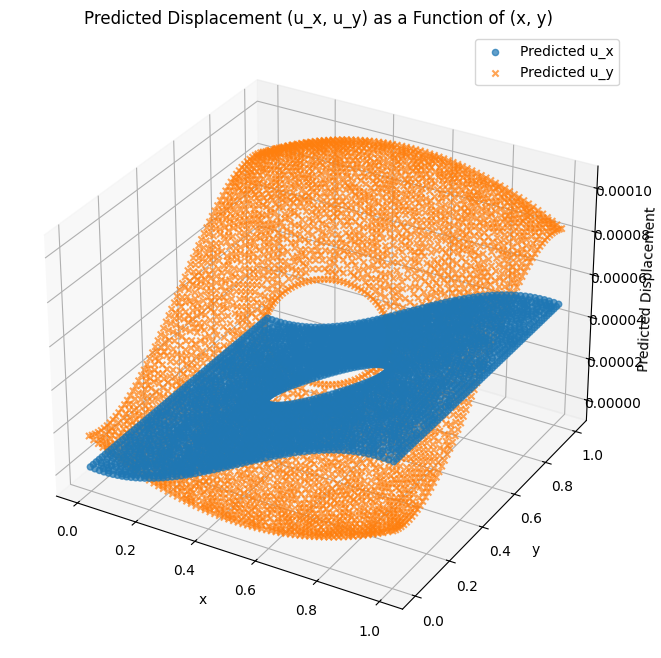

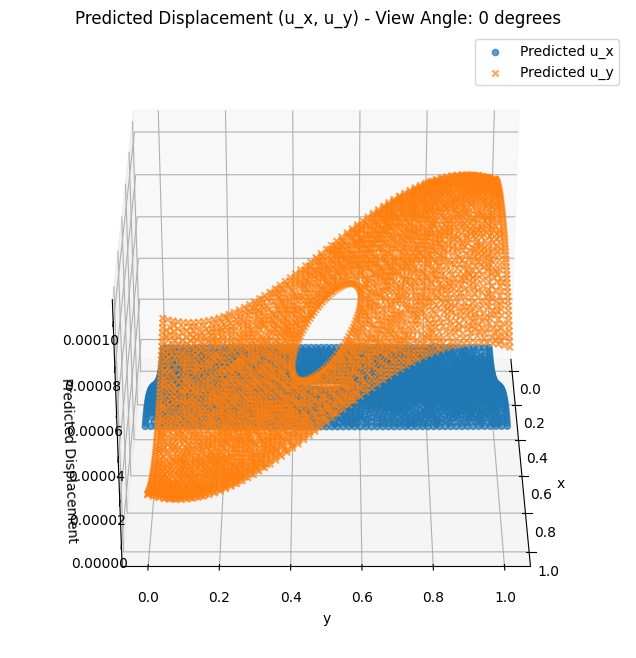

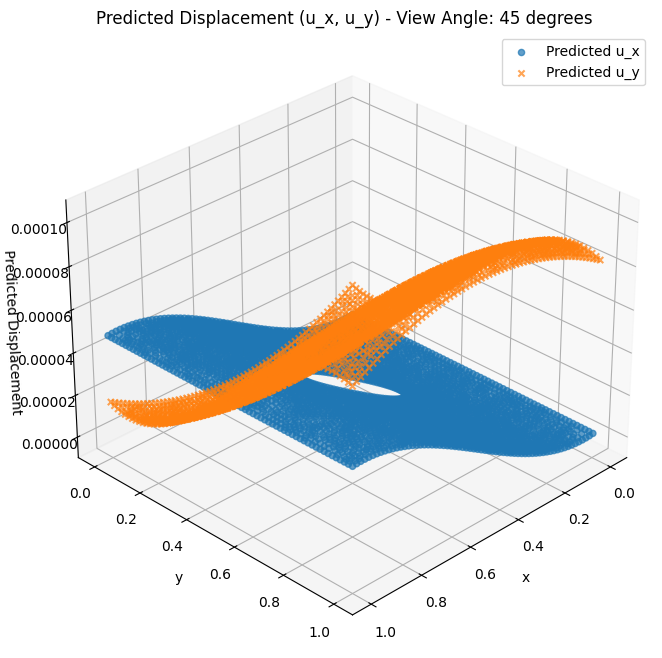

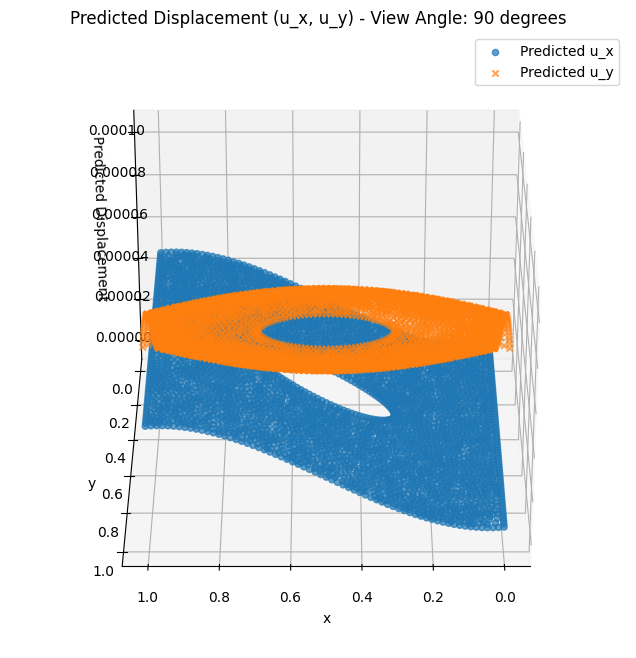

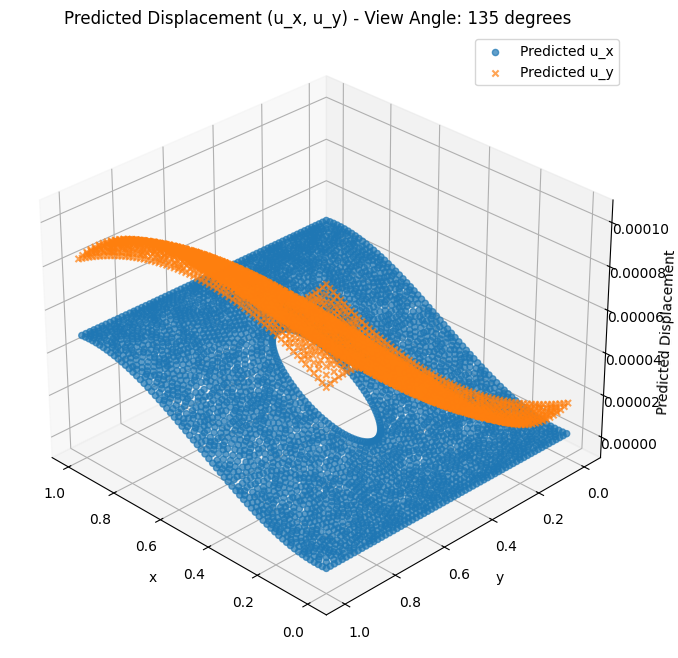

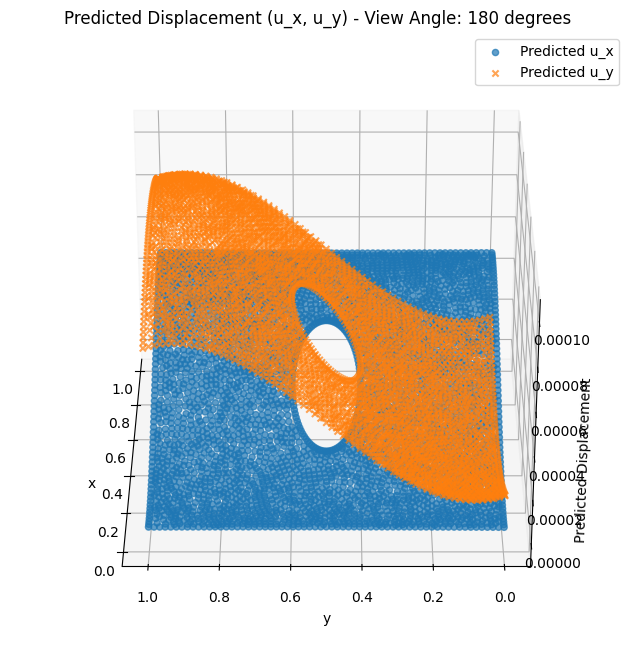

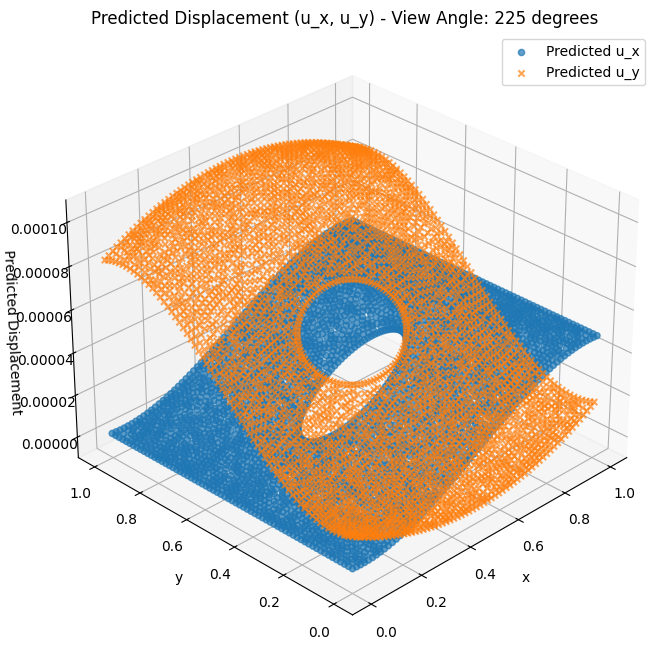

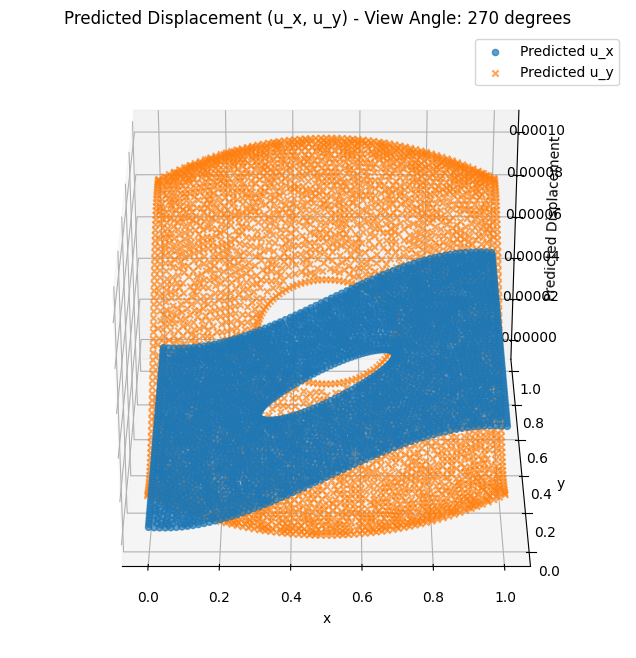

In [32]:
# Predict u_x and u_y using the best-fitting cubic model parameters
predicted_ux = cubic_model(xy_data, *ux_params_dict['ux_df1'][0])
predicted_uy = cubic_model(xy_data, *uy_params_dict['uy_df1'][0])

# Create the 3D plot for predicted values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot predicted u_x
ax.scatter(x, y, predicted_ux, label='Predicted u_x', marker='o', s=20, alpha=0.7) # Added alpha for better visualization

# Plot predicted u_y
ax.scatter(x, y, predicted_uy, label='Predicted u_y', marker='x', s=20, alpha=0.7) # Added alpha for better visualization

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Predicted Displacement')
ax.set_title('Predicted Displacement (u_x, u_y) as a Function of (x, y)')
ax.legend()

# Show the plot
plt.show()

# Function to plot from different angles (for predicted values)
def plot_predicted_from_angles(x, y, predicted_ux, predicted_uy, angles):
    for angle in angles:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(elev=30, azim=angle)

        ax.scatter(x, y, predicted_ux, label='Predicted u_x', marker='o', s=20, alpha=0.7)
        ax.scatter(x, y, predicted_uy, label='Predicted u_y', marker='x', s=20, alpha=0.7)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Predicted Displacement')
        ax.set_title(f'Predicted Displacement (u_x, u_y) - View Angle: {angle} degrees')
        ax.legend()
        plt.show()

# Example angles
angles_to_plot = [0, 45, 90, 135, 180, 225, 270, 315]
plot_predicted_from_angles(x, y, predicted_ux, predicted_uy, angles_to_plot)

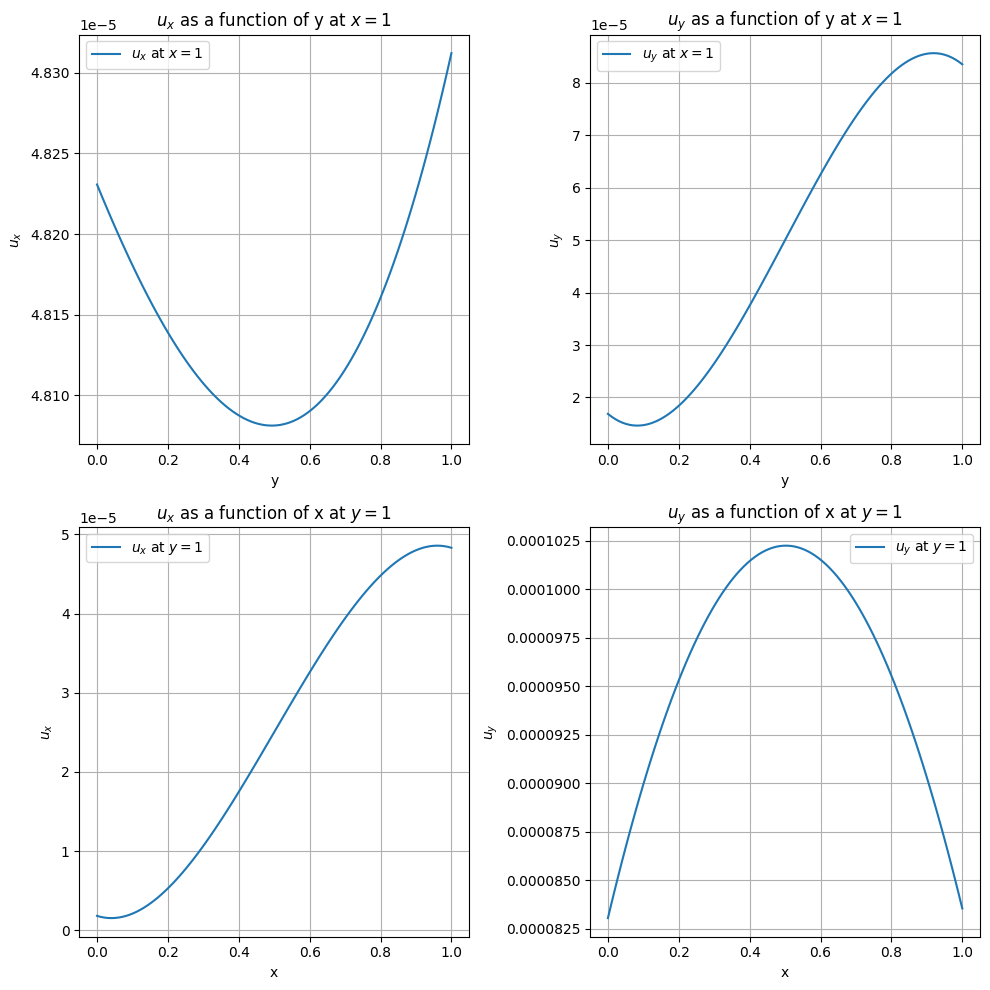

In [33]:
ux_params = ux_params_dict['ux_df1'][0]
uy_params = uy_params_dict['uy_df1'][0]

# Define u_x and u_y as functions of x and y
def u_x(x, y, params):
    a, b, c, d, e, f, g, h, i, j = params
    return a * x**3 + b * y**3 + c * x**2 * y + d * x * y**2 + e * x**2 + f * y**2 + g * x * y + h * x + i * y + j

def u_y(x, y, params):
    a, b, c, d, e, f, g, h, i, j = params
    return a * x**3 + b * y**3 + c * x**2 * y + d * x * y**2 + e * x**2 + f * y**2 + g * x * y + h * x + i * y + j

# Calculate and plot u_x and u_y at fixed x = 1 for varying y
y_values = np.linspace(0, 1, 100)
ux_values_y = [u_x(1, y, ux_params) for y in y_values]
uy_values_y = [u_y(1, y, uy_params) for y in y_values]

# Calculate and plot u_x and u_y at fixed y = 1 for varying x
x_values = np.linspace(0, 1, 100)
ux_values_x = [u_x(x, 1, ux_params) for x in x_values]
uy_values_x = [u_y(x, 1, uy_params) for x in x_values]

# Plotting
plt.figure(figsize=(10, 10))

# u_x as function of y at x = 1
plt.subplot(2, 2, 1)
plt.plot(y_values, ux_values_y, label=r'$u_x$ at $x=1$')
plt.xlabel('y')
plt.ylabel(r'$u_x$')
plt.title(r'$u_x$ as a function of y at $x=1$')
plt.legend()
plt.grid(True)

# u_y as function of y at x = 1
plt.subplot(2, 2, 2)
plt.plot(y_values, uy_values_y, label=r'$u_y$ at $x=1$')
plt.xlabel('y')
plt.ylabel(r'$u_y$')
plt.title(r'$u_y$ as a function of y at $x=1$')
plt.legend()
plt.grid(True)

# u_x as function of x at y = 1
plt.subplot(2, 2, 3)
plt.plot(x_values, ux_values_x, label=r'$u_x$ at $y=1$')
plt.xlabel('x')
plt.ylabel(r'$u_x$')
plt.title(r'$u_x$ as a function of x at $y=1$')
plt.legend()
plt.grid(True)

# u_y as function of x at y = 1
plt.subplot(2, 2, 4)
plt.plot(x_values, uy_values_x, label=r'$u_y$ at $y=1$')
plt.xlabel('x')
plt.ylabel(r'$u_y$')
plt.title(r'$u_y$ as a function of x at $y=1$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#Calculating Strain

In [34]:
from scipy.optimize import curve_fit

# Function for partial derivative of u_x wrt x
def du_x_dx(ux):
    a1, b1, c1, d1, e1, f1, g1, h1, i1, j1 = ux
    # Partial derivative of u_x wrt x
    epsilon_xx_df1 = [0, 0, 0, 0, 3*a1, d1, 2*c1, 2*e1, g1, h1]  # Ordered as [a1, b1, c1, d1, e1, f1, g1, h1, i1, j1]
    return epsilon_xx_df1

# Function for partial derivative of u_y wrt y
def du_y_dy(uy):
    a2, b2, c2, d2, e2, f2, g2, h2, i2, j2 = uy
    # Partial derivative of u_y wrt y
    epsilon_yy_df1 = [0, 0, 0, 0, c2, 3*b2, 2*d2, g2, 2*f2, i2]  # Ordered as [a1, b1, c1, d1, e1, f1, g1, h1, i1, j1]
    return epsilon_yy_df1

# Function for epsilon_xy
def du_xy(ux, uy):
    a1, b1, c1, d1, e1, f1, g1, h1, i1, j1 = ux
    a2, b2, c2, d2, e2, f2, g2, h2, i2, j2 = uy

    # du_x_dy = [0, 0, 0, 0, c1, 3*b1, 2*d1, g1, 2*f1, i1]
    # du_y_dx = [0, 0, 0, 0, 3*a2, d2, 2*c2, 2*e2, g2, h2]
    epsilon_xy_df1 = [
        0,
        0,
        0,
        0,
        (c1 + 3*a2) / 2,
        (3*b1 + d2) / 2,
        (2*d1 + 2*c2) / 2,
        (g1 + 2*e2) / 2,
        (2*f1 + g2) / 2,
        (i1 + h2) / 2
    ]
    return epsilon_xy_df1

epsilon_xx_dict = {}
epsilon_yy_dict = {}
epsilon_xy_dict = {}

# Loop through each load step
for i in range(1, 6):
    # Retrieve fitted parameters for u_x and u_y for the current load step
    ux_params = ux_params_dict[f"ux_df{i}"][0]
    uy_params = uy_params_dict[f"uy_df{i}"][0]

    # Calculate strain components for the current load step
    epsilon_xx_dict[f"epsilon_xx_df{i}"] = du_x_dx(ux_params)
    epsilon_yy_dict[f"epsilon_yy_df{i}"] = du_y_dy(uy_params)
    epsilon_xy_dict[f"epsilon_xy_df{i}"] = du_xy(ux_params, uy_params)

    # Print the results for each load step
    print(f"\nStrain components for Load Step {i}:")
    print(f"epsilon_xx_df{i}: {epsilon_xx_dict[f'epsilon_xx_df{i}']}")
    print(f"epsilon_yy_df{i}: {epsilon_yy_dict[f'epsilon_yy_df{i}']}")
    print(f"epsilon_xy_df{i}: {epsilon_xy_dict[f'epsilon_xy_df{i}']}")



Strain components for Load Step 1:
epsilon_xx_df1: [0, 0, 0, 0, -0.00036246826506114714, 1.3951291713902908e-06, 6.486609990422245e-07, 0.0003621181879555657, -1.7670424306696991e-06, -1.3697692933726467e-05]
epsilon_yy_df1: [0, 0, 0, 0, -0.00015063776214059907, -0.000729852450396263, 2.518671183587439e-06, 0.0001494121548606663, 0.0007288458731492988, -5.448219039252999e-05]
epsilon_xy_df1: [0, 0, 0, 0, 1.0868190644030986e-06, 1.0572689871874364e-06, -0.0001492426329692088, 7.303806298950027e-05, 7.364492086811298e-05, -3.658374165728491e-05]

Strain components for Load Step 2:
epsilon_xx_df2: [0, 0, 0, 0, -0.0007249365329439209, 2.790278508048034e-06, 1.2972993943932693e-06, 0.0007242363910091744, -3.5340933309181036e-06, -2.7395389479553387e-05]
epsilon_yy_df2: [0, 0, 0, 0, -0.00030127553425435743, -0.0014597049126066374, 5.037867135299361e-06, 0.0002988240585418297, 0.001457691497226237, -0.00010896425531702529]
epsilon_xy_df2: [0, 0, 0, 0, 2.1742043890063426e-06, 2.11449000060522

#Visualizing Strain

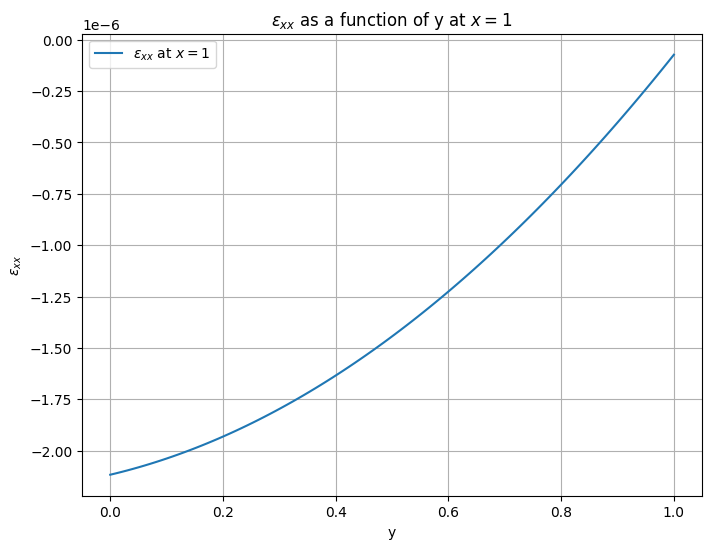

In [35]:
# Given cubic parameters for u_x from previous results (assuming ux_df1 is available)
ux_params = ux_params_dict['ux_df1'][0]

# Define epsilon_xx as a function of x and y
def epsilon_xx(x, y, params):
    a, b, c, d, e, f, g, h, i, j = params
    # Partial derivative of u_x with respect to x to get epsilon_xx
    return 3 * a * x**2 + d * y**2 + 2 * c * x * y + 2 * e * x + g

# Fixed x = 1, generate values of epsilon_xx for a range of y values
y_values = np.linspace(0, 1, 100)  # Example range for y from 0 to 1
epsilon_xx_values = [epsilon_xx(1, y, ux_params) for y in y_values]

# Plot epsilon_xx as a function of y
plt.figure(figsize=(8, 6))
plt.plot(y_values, epsilon_xx_values, label=r'$\epsilon_{xx}$ at $x=1$')
plt.xlabel('y')
plt.ylabel(r'$\epsilon_{xx}$')
plt.title(r'$\epsilon_{xx}$ as a function of y at $x=1$')
plt.legend()
plt.grid(True)
plt.show()


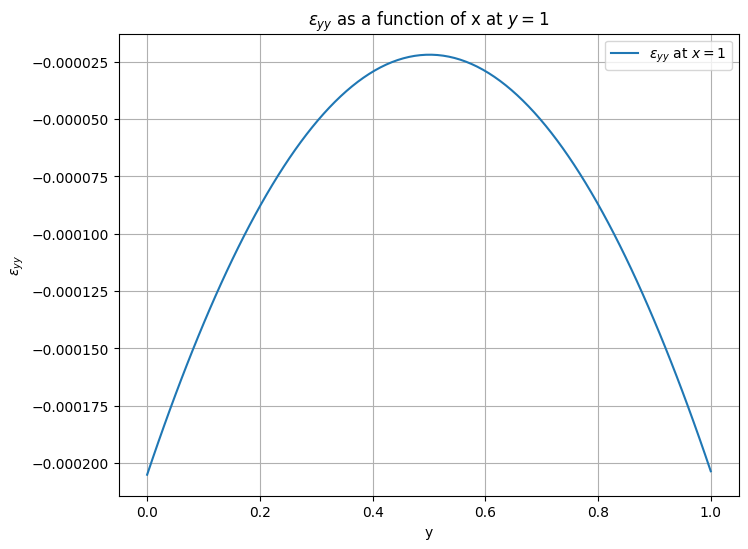

In [36]:
# Given cubic parameters for u_y from previous results (assuming uy_df1 is available)
uy_params = uy_params_dict['uy_df1'][0]

# Define epsilon_yy as a function of x and y
def epsilon_yy(x, y, params):
    a, b, c, d, e, f, g, h, i, j = params
    # Partial derivative of u_y with respect to y to get epsilon_yy
    return 3 * b * y**2 + c * x**2 + 2 * d * x * y + 2 * f * y + i

# Fixed x = 1, generate values of epsilon_yy for a range of y values
x_values = np.linspace(0, 1, 100)  # Example range for y from 0 to 1
epsilon_yy_values = [epsilon_yy(1, x, uy_params) for x in x_values]

# Plot epsilon_yy as a function of y
plt.figure(figsize=(8, 6))
plt.plot(x_values, epsilon_yy_values, label=r'$\epsilon_{yy}$ at $x=1$')
plt.xlabel('y')
plt.ylabel(r'$\epsilon_{yy}$')
plt.title(r'$\epsilon_{yy}$ as a function of x at $y=1$')
plt.legend()
plt.grid(True)
plt.show()

#Calculating Stress

In [37]:
def sigma(epsilon_xx, epsilon_yy):
    a1, b1, c1, d1, e1, f1, g1, h1, i1, j1 = epsilon_xx
    a2, b2, c2, d2, e2, f2, g2, h2, i2, j2 = epsilon_yy

    sigma_xx = [[a1+a2, b1+b2, c1+c2, d1+d2, e1+e2, f1+f2, g1+g2, h1+h2, i1+i2, j1+j2],[2*a1, 2*b1, 2*c1, 2*d1, 2*e1, 2*f1, 2*g1, 2*h1, 2*i1, 2*j1]]
    sigma_yy = [[a1+a2, b1+b2, c1+c2, d1+d2, e1+e2, f1+f2, g1+g2, h1+h2, i1+i2, j1+j2],[2*a2, 2*b2, 2*c2, 2*d2, 2*e2, 2*f2, 2*g2, 2*h2, 2*i2, 2*j2]]

    return sigma_xx, sigma_yy

def tau(epsilon_xy_df1):
    a1, b1, c1, d1, e1, f1, g1, h1, i1, j1 = epsilon_xy_df1

    tau_xy = [[0,0,0,0,0,0,0,0,0,0], [2*a1, 2*b1, 2*c1, 2*d1, 2*e1, 2*f1, 2*g1, 2*h1, 2*i1, 2*j1]]

    return tau_xy

# Load step 1
sigma_xx_df1, sigma_yy_df1 = sigma(epsilon_xx_dict['epsilon_xx_df1'], epsilon_yy_dict['epsilon_yy_df1'])
tau_xy_df1 = tau(epsilon_xy_dict['epsilon_xy_df1'])

# Load step 2
sigma_xx_df2, sigma_yy_df2 = sigma(epsilon_xx_dict['epsilon_xx_df2'], epsilon_yy_dict['epsilon_yy_df2'])
tau_xy_df2 = tau(epsilon_xy_dict['epsilon_xy_df2'])

# Load step 3
sigma_xx_df3, sigma_yy_df3 = sigma(epsilon_xx_dict['epsilon_xx_df3'], epsilon_yy_dict['epsilon_yy_df3'])
tau_xy_df3 = tau(epsilon_xy_dict['epsilon_xy_df3'])

# Load step 4
sigma_xx_df4, sigma_yy_df4 = sigma(epsilon_xx_dict['epsilon_xx_df4'], epsilon_yy_dict['epsilon_yy_df4'])
tau_xy_df4 = tau(epsilon_xy_dict['epsilon_xy_df4'])

# Load step 5
sigma_xx_df5, sigma_yy_df5 = sigma(epsilon_xx_dict['epsilon_xx_df5'], epsilon_yy_dict['epsilon_yy_df5'])
tau_xy_df5 = tau(epsilon_xy_dict['epsilon_xy_df5'])


#Tried integrating the fitted function (Error in lambda/mu values)

In [38]:
import sympy as sp

# Define the integration function with evalf() to ensure small values are displayed
def integrate_substituted_expression(coefficients, variable, constant, lower_limit, upper_limit):
    # Define symbols
    x, y = sp.symbols('x y')

    # Unpack the coefficients list
    a, b, c, d, e, f, g, h, i, j = coefficients

    # Define the cubic expression
    expression = (a * x**3 + b * y**3 + c * x**2 * y + d * x * y**2 +
                  e * x**2 + f * y**2 + g * x * y + h * x + i * y + j)

    expression = expression.xreplace({var: var.evalf() for var in expression.atoms(sp.Symbol)})

    # Substitute the specified variable with the constant
    substituted_expression = expression.subs(variable, constant)

    # Determine the other variable to integrate with respect to
    other_variable = y if variable == x else x

    # Perform the integration and evaluate it to ensure small values are not zeroed out
    integral = sp.integrate(substituted_expression, (other_variable, lower_limit, upper_limit)).evalf()

    return integral

# Limits of integration
a = 0  # Lower limit
b = 1  # Upper limit

coefficients_1 = sigma_xx_df1[0]
coefficients_2 = sigma_xx_df1[1]
coefficients_3 = sigma_yy_df1[0]
coefficients_4 = sigma_yy_df1[1]

# Define variables and constant for substitution
x, y = sp.symbols('x y')
constant = 1  # Substitute x or y with 1

# Integrate each set of coefficients, substituting in x or y as specified
int_trace1_x = integrate_substituted_expression(coefficients_1, x, constant, a, b)
int_2_exx_x = integrate_substituted_expression(coefficients_2, x, constant, a, b)
int_trace1_y = integrate_substituted_expression(coefficients_3, y, constant, a, b)
int_2_eyy_y = integrate_substituted_expression(coefficients_4, y, constant, a, b)

# Print results
# print(int_trace1_x)
# print(int_2_exx_x)
# print(int_trace1_y)
# print(int_2_eyy_y)


#Error encountered in calculating the integral
Due to incorrect fit at the ends of the strain curve, the value of integrals came out to be inaccurate

Approach Changed ->
Now using the csv files(given data) to calculate the integral of stain components.
These integrals were then used to formulate two linear equations in terms of Lamé's constants,
𝜆
 and
𝜇. The equations were subsequently solved using the provided reaction forces.

#Integrating Strain components using the given data

In [39]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from scipy.integrate import trapezoid

results = {}

for step in range(1, 6):
    df = globals()[f'df{step}']
    x_uniform = np.linspace(df['x'].min(), df['x'].max(), 100)
    y_uniform = np.linspace(df['y'].min(), df['y'].max(), 100)
    X, Y = np.meshgrid(x_uniform, y_uniform)

    ux_grid = griddata((df['x'], df['y']), df['u_x'], (X, Y), method='cubic')
    uy_grid = griddata((df['x'], df['y']), df['u_y'], (X, Y), method='cubic')

    dux_dx = np.gradient(ux_grid, axis=1) / (x_uniform[1] - x_uniform[0])
    duy_dy = np.gradient(uy_grid, axis=0) / (y_uniform[1] - y_uniform[0])

    x_idx = np.argmin(np.abs(x_uniform - 1))
    y_idx = np.argmin(np.abs(y_uniform - 1))

    dux_dx_at_x1 = dux_dx[:, x_idx]
    integral_dux_dx = trapezoid(dux_dx_at_x1, y_uniform)

    duy_dy_at_y1 = duy_dy[y_idx, :]
    integral_duy_dy = trapezoid(duy_dy_at_y1, x_uniform)

    dux_dx_at_y1 = dux_dx[y_idx, :]
    integral_dux_dx_y1 = trapezoid(dux_dx_at_y1, x_uniform)

    duy_dy_at_x1 = duy_dy[:, x_idx]
    integral_duy_dy_x1 = trapezoid(duy_dy_at_x1, y_uniform)

    results[f'Load Step {step}'] = {
        f"integral_dux_dx{step}": integral_dux_dx,                              #Integral of del(ux)/dx from y=0 to y=1
        f"integral_duy_dy{step}": integral_duy_dy,                              #Integral of del(uy)/dy from x=0 to x=1
        f"integral_dux_dx_y1{step}": integral_dux_dx_y1,                        #Integral of del(ux)/dx at y=1 from x=0 to x=1
        f"integral_duy_dy_x1{step}": integral_duy_dy_x1                         #Integral of del(uy)/dy at x=1 from y=0 to y=1
    }

for step, result in results.items():
    print(f"\n{step}:")
    for key, value in result.items():
        print(f"{key}: {value}")



Load Step 1:
integral_dux_dx1: 3.1311776427953905e-05
integral_duy_dy1: 6.72542637657504e-05
integral_dux_dx_y11: 4.9999999999999996e-05
integral_duy_dy_x11: 9.999999999999999e-05

Load Step 2:
integral_dux_dx2: 6.262355285590781e-05
integral_duy_dy2: 0.0001345085275349579
integral_dux_dx_y12: 9.999999999999999e-05
integral_duy_dy_x12: 0.00019999999999999998

Load Step 3:
integral_dux_dx3: 9.393138717419573e-05
integral_duy_dy3: 0.00020176279130075937
integral_dux_dx_y13: 0.00015
integral_duy_dy_x13: 0.0003

Load Step 4:
integral_dux_dx4: 0.00012524184956485266
integral_duy_dy4: 0.00026901509638553594
integral_dux_dx_y14: 0.00019999999999999998
integral_duy_dy_x14: 0.0004

Load Step 5:
integral_dux_dx5: 0.0001565523119554419
integral_duy_dy5: 0.0003362688704812112
integral_dux_dx_y15: 0.00025
integral_duy_dy_x15: 0.0005


#Solving for lambda and mu

In [40]:
import numpy as np

lambda_list = []
mu_list = []

def solve_linear_eq(eq1, eq2):
    a1, b1, c1 = map(float, eq1)
    a2, b2, c2 = map(float, eq2)

    A = np.array([[a1, b1], [a2, b2]], dtype=float)
    B = np.array([c1, c2], dtype=float)

    try:
        solution = np.linalg.solve(A, B)
        x, y = solution
        return x, y
    except np.linalg.LinAlgError:
        return "The equations are either inconsistent or have infinitely many solutions."


for step in range(1, 6):

    eq1 = [results[f'Load Step {step}'][f'integral_dux_dx{step}'] + results[f'Load Step {step}'][f'integral_duy_dy_x1{step}'],
           2 * results[f'Load Step {step}'][f'integral_dux_dx{step}'],
           globals()[f'R4_df{step}']]

    eq2 = [results[f'Load Step {step}'][f'integral_duy_dy{step}'] + results[f'Load Step {step}'][f'integral_dux_dx_y1{step}'],
           2 * results[f'Load Step {step}'][f'integral_duy_dy{step}'],
           globals()[f'R2_df{step}']]

    solution = solve_linear_eq(eq1, eq2)

    if isinstance(solution, tuple):
        lambda_value, mu_value = solution
        results[f'Load Step {step}']['lambda'] = lambda_value  # Add lambda and mu to existing load step data
        results[f'Load Step {step}']['mu'] = mu_value
    else:
        results[f'Load Step {step}']['Error'] = solution

for step, result in results.items():
    print(f"\n{step}:")
    lambda_list.append(result['lambda'])
    mu_list.append(result['mu'])
    print("lambda: ", result['lambda'])
    print("mu: ", result['mu'])


Load Step 1:
lambda:  123883832096.86609
mu:  80673343554.46678

Load Step 2:
lambda:  123883832099.85689
mu:  80673343548.19536

Load Step 3:
lambda:  123888717291.63132
mu:  80669085012.20647

Load Step 4:
lambda:  123887869779.1054
mu:  80670862170.79884

Load Step 5:
lambda:  123887869797.2153
mu:  80670862173.50984


#Finding average values of Lame's constants

In [41]:
lambda_avg = np.mean(lambda_list)
mu_avg = np.mean(mu_list)

print("Average of lambda list:", lambda_avg)
print("Average of mu list:", mu_avg)

Average of lambda list: 123886424212.93498
Average of mu list: 80671499291.83545


#Displaying Strain distribution

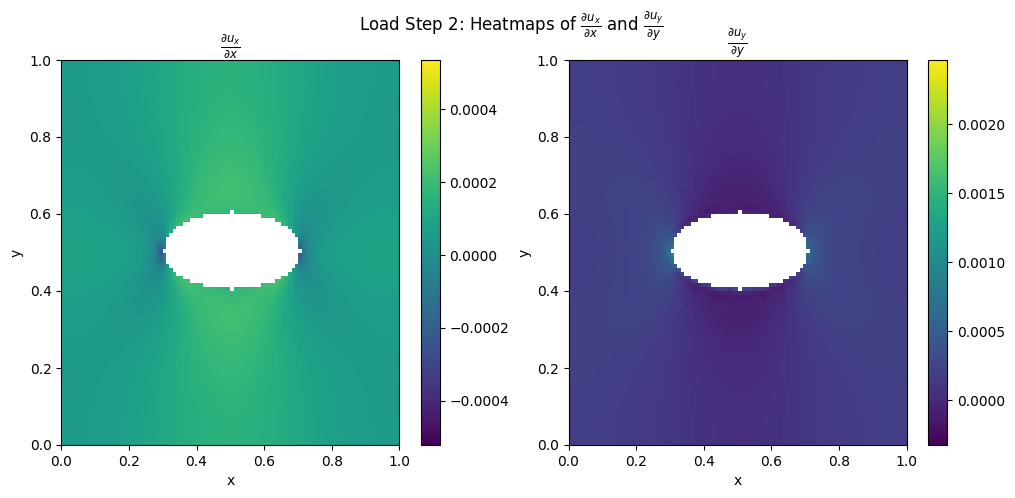

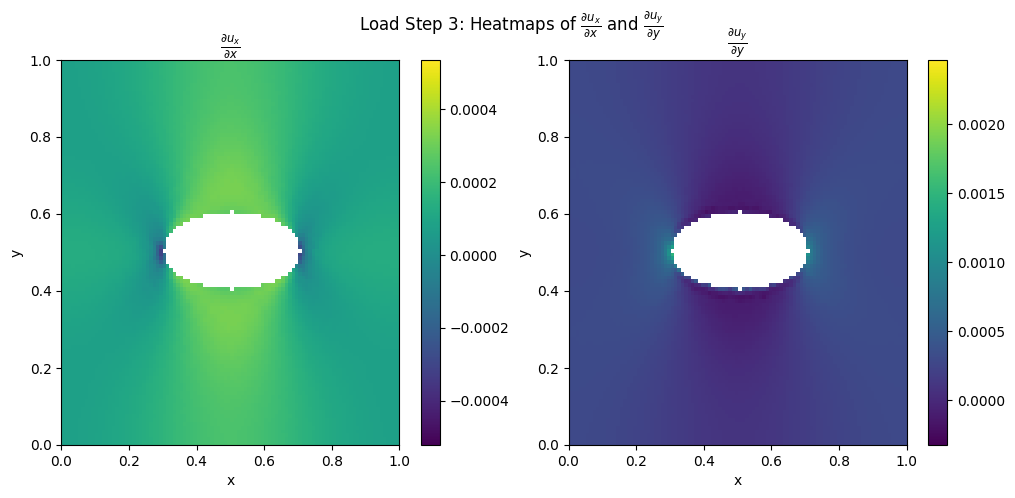

In [45]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Dictionaries to store results and global min/max values
results = {}
dux_dx_min, dux_dx_max = np.inf, -np.inf
duy_dy_min, duy_dy_max = np.inf, -np.inf

# Define elliptical mask parameters
ellipse_center = (50, 50)  # approximate center of the ellipse in grid indices
ellipse_width, ellipse_height = 20, 10  # approximate width and height of the ellipse

def create_ellipse_mask1(shape, center, width, height):
    """Create a boolean mask for an ellipse."""
    y, x = np.ogrid[:shape[0], :shape[1]]
    mask = ((x - center[0]) ** 2 / width ** 2 + (y - center[1]) ** 2 / height ** 2) > 1
    return mask

# First pass: Calculate global min and max for uniform color coding
for step in range(1, 6):
    df = globals()[f'df{step}']
    x_uniform = np.linspace(df['x'].min(), df['x'].max(), 100)
    y_uniform = np.linspace(df['y'].min(), df['y'].max(), 100)
    X, Y = np.meshgrid(x_uniform, y_uniform)

    # Interpolate ux and uy on a uniform grid
    ux_grid = griddata((df['x'], df['y']), df['u_x'], (X, Y), method='cubic')
    uy_grid = griddata((df['x'], df['y']), df['u_y'], (X, Y), method='cubic')

    # Calculate the derivatives
    dux_dx = np.gradient(ux_grid, axis=1) / (x_uniform[1] - x_uniform[0])
    duy_dy = np.gradient(uy_grid, axis=0) / (y_uniform[1] - y_uniform[0])

    # Apply mask to remove the elliptical region
    mask = create_ellipse_mask1(dux_dx.shape, ellipse_center, ellipse_width, ellipse_height)
    dux_dx = np.where(mask, dux_dx, np.nan)  # Masking with NaN values
    duy_dy = np.where(mask, duy_dy, np.nan)

    # Update global min and max
    dux_dx_min = min(dux_dx_min, np.nanmin(dux_dx))
    dux_dx_max = max(dux_dx_max, np.nanmax(dux_dx))
    duy_dy_min = min(duy_dy_min, np.nanmin(duy_dy))
    duy_dy_max = max(duy_dy_max, np.nanmax(duy_dy))

# Second pass: Plot with uniform color coding
for step in range(1, 6):
    df = globals()[f'df{step}']
    x_uniform = np.linspace(df['x'].min(), df['x'].max(), 100)
    y_uniform = np.linspace(df['y'].min(), df['y'].max(), 100)
    X, Y = np.meshgrid(x_uniform, y_uniform)

    # Interpolate ux and uy on a uniform grid
    ux_grid = griddata((df['x'], df['y']), df['u_x'], (X, Y), method='cubic')
    uy_grid = griddata((df['x'], df['y']), df['u_y'], (X, Y), method='cubic')

    # Calculate the derivatives
    dux_dx = np.gradient(ux_grid, axis=1) / (x_uniform[1] - x_uniform[0])
    duy_dy = np.gradient(uy_grid, axis=0) / (y_uniform[1] - y_uniform[0])

    # Apply mask to remove the elliptical region
    mask = create_ellipse_mask1(dux_dx.shape, ellipse_center, ellipse_width, ellipse_height)
    dux_dx = np.where(mask, dux_dx, np.nan)  # Masking with NaN values
    duy_dy = np.where(mask, duy_dy, np.nan)

    # Store derivatives in results
    results[f'Load Step {step}'] = {"dux_dx": dux_dx, "duy_dy": duy_dy}

    # Plot heatmaps with uniform color coding
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Load Step {step}: Heatmaps of $\\frac{{\\partial u_x}}{{\\partial x}}$ and $\\frac{{\\partial u_y}}{{\\partial y}}$")

    # Heatmap for dux/dx
    c1 = axs[0].imshow(dux_dx, extent=(x_uniform.min(), x_uniform.max(), y_uniform.min(), y_uniform.max()),
                       origin='lower', aspect='auto', cmap='viridis',
                       vmin=dux_dx_min, vmax=dux_dx_max)
    axs[0].set_title("$\\frac{\\partial u_x}{\\partial x}$")
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    fig.colorbar(c1, ax=axs[0])

    # Heatmap for duy/dy
    c2 = axs[1].imshow(duy_dy, extent=(x_uniform.min(), x_uniform.max(), y_uniform.min(), y_uniform.max()),
                       origin='lower', aspect='auto', cmap='viridis',
                       vmin=duy_dy_min, vmax=duy_dy_max)
    axs[1].set_title("$\\frac{\\partial u_y}{\\partial y}$")
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    fig.colorbar(c2, ax=axs[1])

    plt.show()

#Displaying Stress Distribution

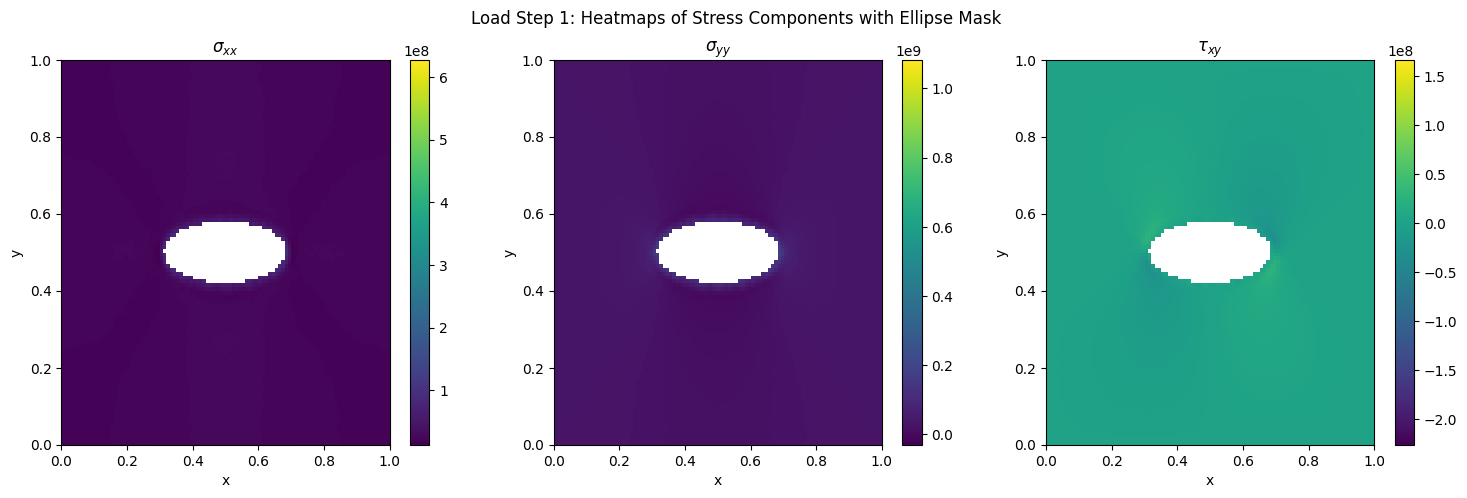

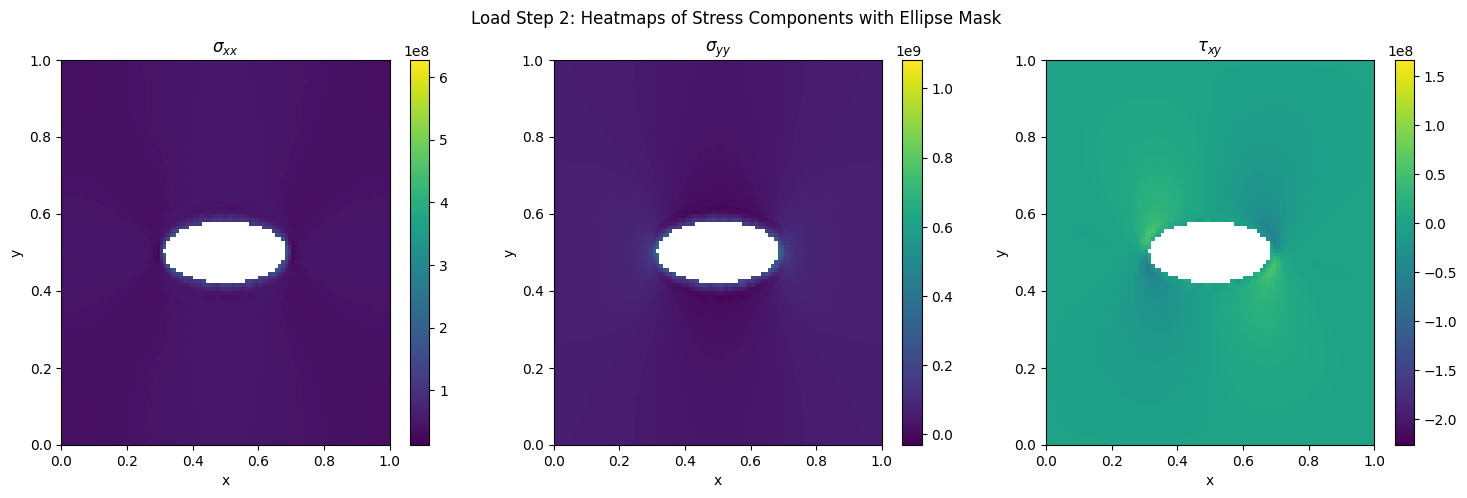

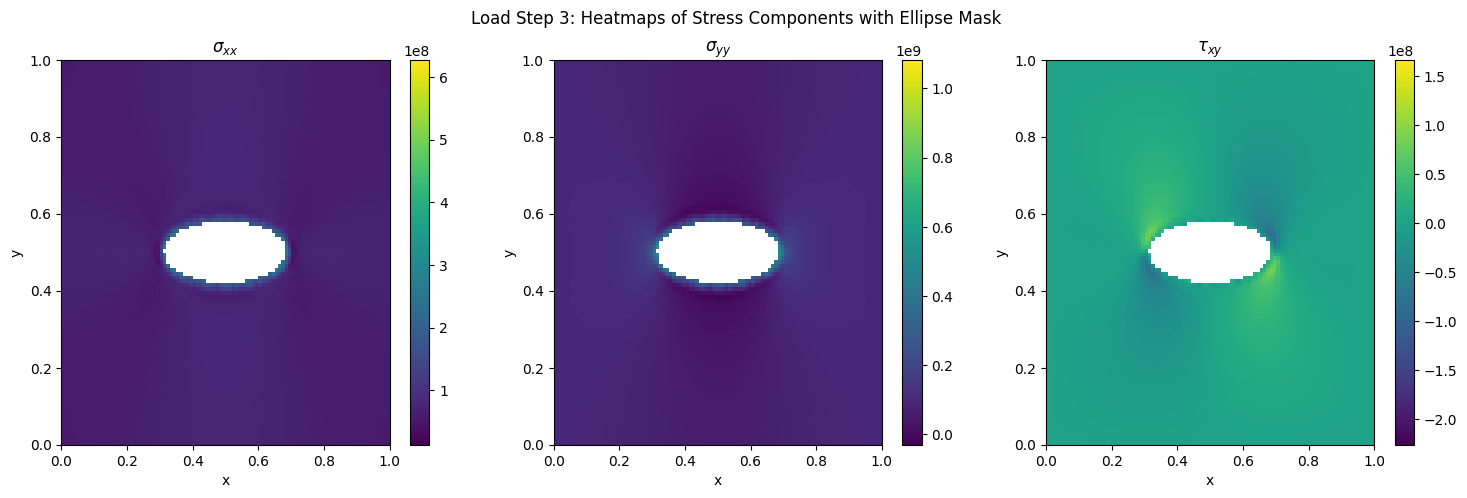

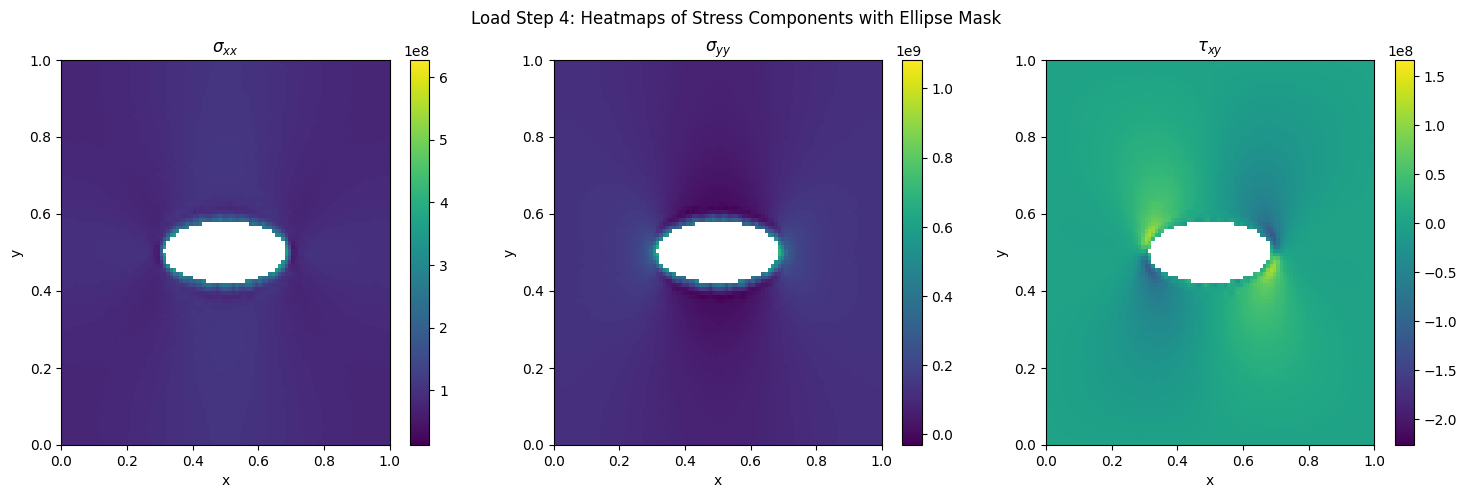

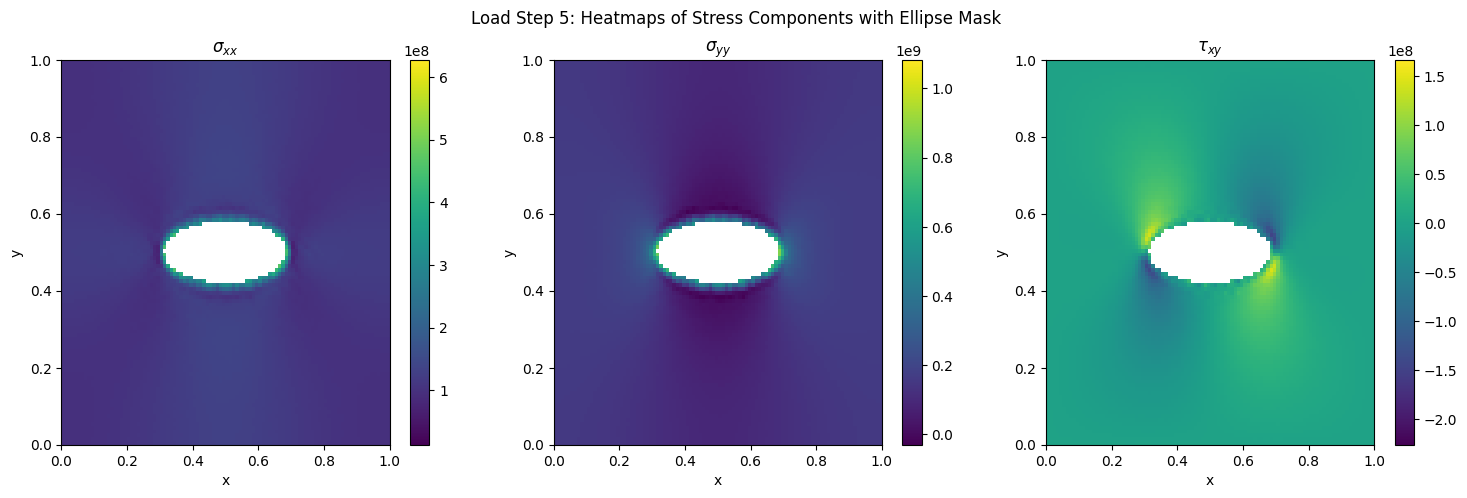

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Function to create an elliptical mask
def create_ellipse_mask(X, Y, center, a, b):
    xc, yc = center
    return ((X - xc)**2 / a**2 + (Y - yc)**2 / b**2) <= 1

# Lambda and mu for each load step (replace with your calculated values)
lambda_values = lambda_list  # Replace with actual values
mu_values = mu_list  # Replace with actual values

# Global min and max for uniform color scales
sigma_xx_min, sigma_xx_max = float('inf'), float('-inf')
sigma_yy_min, sigma_yy_max = float('inf'), float('-inf')
tau_xy_min, tau_xy_max = float('inf'), float('-inf')

# First pass: Calculate global min and max values
for step in range(1, 6):
    df = globals()[f'df{step}']
    x_uniform = np.linspace(df['x'].min(), df['x'].max(), 100)
    y_uniform = np.linspace(df['y'].min(), df['y'].max(), 100)
    X, Y = np.meshgrid(x_uniform, y_uniform)

    # Interpolate ux and uy on a uniform grid
    ux_grid = griddata((df['x'], df['y']), df['u_x'], (X, Y), method='cubic')
    uy_grid = griddata((df['x'], df['y']), df['u_y'], (X, Y), method='cubic')

    # Calculate the derivatives
    dux_dx = np.gradient(ux_grid, axis=1) / (x_uniform[1] - x_uniform[0])
    duy_dy = np.gradient(uy_grid, axis=0) / (y_uniform[1] - y_uniform[0])
    dux_dy = np.gradient(ux_grid, axis=0) / (y_uniform[1] - y_uniform[0])
    duy_dx = np.gradient(uy_grid, axis=1) / (x_uniform[1] - x_uniform[0])

    # Calculate stress components
    lambda_val = lambda_values[step - 1]
    mu_val = mu_values[step - 1]

    sigma_xx = lambda_val * (dux_dx + duy_dy) + 2 * mu_val * dux_dx
    sigma_yy = lambda_val * (dux_dx + duy_dy) + 2 * mu_val * duy_dy
    tau_xy = mu_val * (dux_dy + duy_dx)

    # Update global min and max
    sigma_xx_min, sigma_xx_max = min(sigma_xx_min, np.nanmin(sigma_xx)), max(sigma_xx_max, np.nanmax(sigma_xx))
    sigma_yy_min, sigma_yy_max = min(sigma_yy_min, np.nanmin(sigma_yy)), max(sigma_yy_max, np.nanmax(sigma_yy))
    tau_xy_min, tau_xy_max = min(tau_xy_min, np.nanmin(tau_xy)), max(tau_xy_max, np.nanmax(tau_xy))

# Second pass: Plot with uniform color scales and ellipse masking
for step in range(1, 6):
    df = globals()[f'df{step}']
    x_uniform = np.linspace(df['x'].min(), df['x'].max(), 100)
    y_uniform = np.linspace(df['y'].min(), df['y'].max(), 100)
    X, Y = np.meshgrid(x_uniform, y_uniform)

    # Interpolate ux and uy on a uniform grid
    ux_grid = griddata((df['x'], df['y']), df['u_x'], (X, Y), method='cubic')
    uy_grid = griddata((df['x'], df['y']), df['u_y'], (X, Y), method='cubic')

    # Calculate the derivatives
    dux_dx = np.gradient(ux_grid, axis=1) / (x_uniform[1] - x_uniform[0])
    duy_dy = np.gradient(uy_grid, axis=0) / (y_uniform[1] - y_uniform[0])
    dux_dy = np.gradient(ux_grid, axis=0) / (y_uniform[1] - y_uniform[0])
    duy_dx = np.gradient(uy_grid, axis=1) / (x_uniform[1] - x_uniform[0])

    # Calculate stress components
    lambda_val = lambda_values[step - 1]
    mu_val = mu_values[step - 1]

    sigma_xx = lambda_val * (dux_dx + duy_dy) + 2 * mu_val * dux_dx
    sigma_yy = lambda_val * (dux_dx + duy_dy) + 2 * mu_val * duy_dy
    tau_xy = mu_val * (dux_dy + duy_dx)

    # Estimate ellipse parameters
    threshold = 0.5 * np.max(sigma_xx)  # 50% of max sigma_xx value as a threshold
    mask_high_values = sigma_xx > threshold
    if np.any(mask_high_values):
        yc, xc = np.mean(Y[mask_high_values]), np.mean(X[mask_high_values])  # Approximate center
        a = (X[mask_high_values].max() - X[mask_high_values].min()) / 2  # Semi-major axis
        b = (Y[mask_high_values].max() - Y[mask_high_values].min()) / 2  # Semi-minor axis
        ellipse_center = (xc, yc)
    else:
        ellipse_center = (0, 0)
        a, b = 0.5, 0.2

    # Create elliptical mask and apply it
    ellipse_mask = create_ellipse_mask(X, Y, ellipse_center, a, b)
    sigma_xx = np.where(ellipse_mask, np.nan, sigma_xx)
    sigma_yy = np.where(ellipse_mask, np.nan, sigma_yy)
    tau_xy = np.where(ellipse_mask, np.nan, tau_xy)

    # Plot heatmaps with global color scales
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Load Step {step}: Heatmaps of Stress Components")

    # Heatmap for sigma_xx
    c1 = axs[0].imshow(sigma_xx, extent=(x_uniform.min(), x_uniform.max(), y_uniform.min(), y_uniform.max()),
                       origin='lower', aspect='auto', cmap='viridis',
                       vmin=sigma_xx_min, vmax=sigma_xx_max)
    axs[0].set_title("$\\sigma_{xx}$")
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    fig.colorbar(c1, ax=axs[0])

    # Heatmap for sigma_yy
    c2 = axs[1].imshow(sigma_yy, extent=(x_uniform.min(), x_uniform.max(), y_uniform.min(), y_uniform.max()),
                       origin='lower', aspect='auto', cmap='viridis',
                       vmin=sigma_yy_min, vmax=sigma_yy_max)
    axs[1].set_title("$\\sigma_{yy}$")
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    fig.colorbar(c2, ax=axs[1])

    # Heatmap for tau_xy
    c3 = axs[2].imshow(tau_xy, extent=(x_uniform.min(), x_uniform.max(), y_uniform.min(), y_uniform.max()),
                       origin='lower', aspect='auto', cmap='viridis',
                       vmin=tau_xy_min, vmax=tau_xy_max)
    axs[2].set_title("$\\tau_{xy}$")
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    fig.colorbar(c3, ax=axs[2])

    plt.show()
